<a href="https://colab.research.google.com/github/cctorres/SIM-II/blob/main/SIM_II_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiotocographic data**

Santiago Montoya

Cristian Camilo Torres Alzate

# **Importacion de Librerias**

In [1]:
!pip install xlrd==1.2.0
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


     |████████████████████████████████| 103 kB 9.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# **Cargando el DataSet**

In [2]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls'

df = pd.read_excel(url, sheet_name='Data', skipfooter=3)
df = df.drop(columns=df.filter(like='Unnamed').columns)
df.columns = df.iloc[0].to_list()
df = df[1:].reset_index(drop=True)

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0,0,0,0,0,0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


# **Entradas faltantes**

In [3]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   LB        2126 non-null   int64
 1   AC        2126 non-null   int64
 2   FM        2126 non-null   int64
 3   UC        2126 non-null   int64
 4   DL        2126 non-null   int64
 5   DS        2126 non-null   int64
 6   DP        2126 non-null   int64
 7   ASTV      2126 non-null   int64
 8   MSTV      2126 non-null   int64
 9   ALTV      2126 non-null   int64
 10  MLTV      2126 non-null   int64
 11  Width     2126 non-null   int64
 12  Min       2126 non-null   int64
 13  Max       2126 non-null   int64
 14  Nmax      2126 non-null   int64
 15  Nzeros    2126 non-null   int64
 16  Mode      2126 non-null   int64
 17  Mean      2126 non-null   int64
 18  Median    2126 non-null   int64
 19  Variance  2126 non-null   int64
 20  Tendency  2126 non-null   int64
 21  CLASS     2126 non-null   int64
 22  

# **Desbalance**

1    1655
2     295
3     176
Name: NSP, dtype: int64

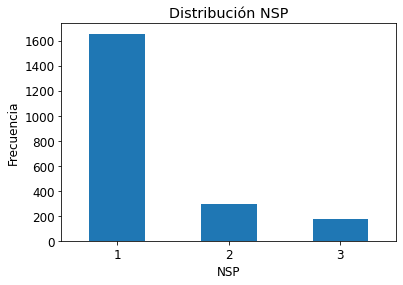

In [4]:
values = df["NSP"].value_counts()
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["NSP"]).plot.bar(rot=0)
plt.title('Distribución NSP')
plt.xlabel('NSP')
plt.ylabel('Frecuencia')

df["NSP"].value_counts()


# **Entrenamiento**

In [5]:
x = df.iloc[:, 0:21].values
y = df.iloc[:, 22].values
y=y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **Analisis discriminante Cuadratico**

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
arr = np.array([['Kernel','Score']])
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train, y_train)

qda_score=QDA.score(x_train, y_train)
y_pred = QDA.predict(x_test)
qda_accuracy_score = accuracy_score(y_test, y_pred)

row = np.array([qda_score,qda_accuracy_score])
arr = np.append(arr,[row],axis= 0)
table = pd.DataFrame(data=arr)
table.head(table.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,0,1
0,Kernel,Score
1,0.7553324968632371,0.7481203007518797


# **Ventana de Parzen - Kernel**

In [8]:
from sklearn.neighbors import KernelDensity
arr = np.array([['Kernel','Score']])
kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

for k in kernel:

  PW = KernelDensity(kernel=k)
  PW.fit(x_train, y_train)

  pw_score=PW.score(x_train, y_train)

  row = np.array([k,pw_score])
  arr = np.append(arr,[row],axis= 0)

table = pd.DataFrame(data=arr)
table.head(table.shape[0])

,0,1
0,Kernel,Score
1,gaussian,-31502.757100147184
2,tophat,5834.672084129061
3,epanechnikov,8271.717053168648
4,exponential,-66978.6273663641
5,linear,8529.046975007172
6,cosine,4879.487365226221


# **Gradient Boosting Tree**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
#GradientBoostingTree
arr = np.array([['# Trees','Score','Accuracy']])
number_trees = [10, 50, 100, 200]

for t in number_trees:
  reg = GradientBoostingClassifier(n_estimators=t)
  reg.fit(x_train, y_train)

  gb_score=reg.score(x_train, y_train)
  y_pred = reg.predict(x_test)
  gb_accuracy_score = accuracy_score(y_test, y_pred)

  row = np.array([t,gb_score,gb_accuracy_score])
  arr = np.append(arr,[row],axis= 0)
table = pd.DataFrame(data=arr)
table.head(table.shape[0])

,0,1,2
0,# Trees,Score,Accuracy
1,10.0,0.9259723964868256,0.9154135338345865
2,50.0,0.9730238393977415,0.9285714285714286
3,100.0,0.986198243412798,0.9266917293233082
4,200.0,0.9981179422835633,0.9323308270676691


# **Redes Neuronales Artificales**

In [10]:
from sklearn.neural_network import MLPClassifier

arr = np.array([['# Hidden Layers','Activation','Score','Accuracy']])
number_layer = [2, 5,10]
activation_list = ['identity', 'logistic', 'tanh', 'relu']
for n in number_layer:
  for a in activation_list:
    reg = MLPClassifier(hidden_layer_sizes=(n,), activation=a)
    reg.fit(x_train, y_train)

    gb_score=reg.score(x_train, y_train)
    y_pred = reg.predict(x_test)
    gb_accuracy_score = accuracy_score(y_test, y_pred)

    row = np.array([n,a,gb_score,gb_accuracy_score])
    arr = np.append(arr,[row],axis= 0)
table = pd.DataFrame(data=arr)
table.head(table.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

,0,1,2,3
0,# Hidden Layers,Activation,Score,Accuracy
1,2,identity,0.8506900878293601,0.8421052631578947
2,2,logistic,0.7810539523212046,0.7706766917293233
3,2,tanh,0.7879548306148055,0.7763157894736842
4,2,relu,0.8262233375156838,0.8176691729323309
5,5,identity,0.8500627352572145,0.8458646616541353
6,5,logistic,0.7917189460476788,0.7744360902255639
7,5,tanh,0.8381430363864492,0.8383458646616542
8,5,relu,0.8299874529485571,0.8157894736842105
9,10,identity,0.8720200752823086,0.8609022556390977


# **Maquinas de Soporte Vectorial**


In [11]:
#SVM
from sklearn import svm

C_list = [ 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
arr = np.array([['Kernel','C','Score','Accuracy']])

for k in kernel:
  for c in C_list:

    kf = KFold(n_splits=10)

    svm_reg = svm.SVC(C = c, kernel = k)
    svm_reg.fit(x_train, y_train)

    svm_score=svm_reg.score(x_train, y_train)
    y_pred = svm_reg.predict(x_test)
    svm_accuracy_score = accuracy_score(y_test, y_pred)
    row = np.array([k,c,svm_score,svm_accuracy_score])
    arr = np.append(arr,[row],axis= 0)

table = pd.DataFrame(data=arr)
table.head(table.shape[0])

,0,1,2,3
0,Kernel,C,Score,Accuracy
1,linear,0.1,0.8293601003764115,0.8139097744360902
2,linear,1,0.8801756587202008,0.8778195488721805
3,linear,10,0.8883312421580929,0.8796992481203008
4,poly,0.1,0.8726474278544541,0.8703007518796992
5,poly,1,0.9121706398996235,0.9060150375939849
6,poly,10,0.9335006273525721,0.900375939849624
7,rbf,0.1,0.8343789209535759,0.8195488721804511
8,rbf,1,0.890840652446675,0.8928571428571429
9,rbf,10,0.9240903387703889,0.9022556390977443


# **Correlacion Caracteristicas**

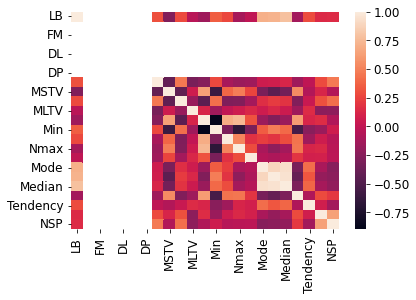

In [12]:
import seaborn as sns
sns.heatmap(df.corr())